<a href="https://colab.research.google.com/github/LeonieFetzer/DHBW_kNN_Gruppe-3/blob/main/Random_Forest_KI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Datensatz

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
# Datensatz importieren
from google.colab import files
uploaded = files.upload()

import pandas as pd
telefonkunden = pd.read_csv('telefonkunden.csv')

Saving telefonkunden.csv to telefonkunden.csv


,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


(1000, 12)

In [ ]:
print("Anzahl Zeilen, Spalten:", telefonkunden.shape)
print("Spaltennamen:", telefonkunden.columns.tolist())
print(telefonkunden.head(5))  # die ersten 5 Zeilen ausgeben

# Prüfen auf fehlende Werte
print("\nFehlende Werte pro Spalte:\n", telefonkunden.isnull().sum())

# Separieren von Features (X) und Zielvariable (y)
X = telefonkunden.drop('custcat', axis=1)   # alle Spalten außer 'custcat' als Features; .drop löscht Spalten
y = telefonkunden['custcat']               # Zielvariable 'custcat'

Anzahl Zeilen, Spalten: (1000, 12)
Spaltennamen: ['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed', 'employ', 'retire', 'gender', 'reside', 'custcat']
   region  tenure  age  marital  address  income  ed  employ  retire  gender  \
0       2      13   44        1        9    64.0   4       5     0.0       0   
1       3      11   33        1        7   136.0   5       5     0.0       0   
2       3      68   52        1       24   116.0   1      29     0.0       1   
3       2      33   33        0       12    33.0   2       0     0.0       1   
4       2      23   30        1        9    30.0   1       2     0.0       0   

   reside  custcat  
0       2        1  
1       6        4  
2       2        3  
3       1        1  
4       4        3  

Fehlende Werte pro Spalte:
 region     0
tenure     0
age        0
marital    0
address    0
income     0
ed         0
employ     0
retire     0
gender     0
reside     0
custcat    0
dtype: int64


# Aufteilung Datensatz

In [ ]:
from sklearn.model_selection import train_test_split

# Datensatz aufteilen in 80% Training und 20% Test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Parameter der Daten ausgeben
print("Trainingsdaten:", X_train.shape, "Trainingslabels:", y_train.shape)
print("Testdaten:", X_test.shape, "Testlabels:", y_test.shape)

Trainingsdaten: (800, 11) Trainingslabels: (800,)
Testdaten: (200, 11) Testlabels: (200,)


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Ersten Random-Forest mit Default-Werten erstellen
model = RandomForestClassifier(random_state=0)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Genaugiekit: {accuracy}')

RandomForestClassifier(random_state=0)

Genaugiekit: 0.37


In [ ]:
# Erarbeiten der besten Parameter
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [125, 130],
    'max_features': ["sqrt", "log2", None],
    'max_depth': [None, 12, 14],
    'min_samples_split': [4, 6],
    'min_samples_leaf': [2, 3],
    'bootstrap': [True, False]
}

tree_op = RandomForestClassifier(random_state=1)

grid_search = GridSearchCV(estimator = tree_op, param_grid = param_grid,
                           cv=5)
grid_search.fit(X_train, y_train)

print("Beste Genauigkeit:", grid_search.best_score_)
print(grid_search.best_estimator_) # Optimale Parameter

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 12, 14],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [2, 3],
                         'min_samples_split': [4, 6],
                         'n_estimators': [125, 130]})

Beste Genauigkeit: 0.39
RandomForestClassifier(max_depth=12, min_samples_leaf=3, min_samples_split=4,
                       n_estimators=125, random_state=1)


In [ ]:
# Vorhersage mit dem besten Modell
from sklearn.metrics import classification_report

best_forest = grid_search.best_estimator_
y_pred_best = best_forest.predict(X_test)
accuracy_best = accuracy_score(y_pred_best, y_test)
print(f'Genauigkeit des optimierten Modells: {accuracy_best}')


Genauigkeit des optimierten Modells: 0.39


In [ ]:
# Genauigkeiten Evaluation
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(best_forest, X_train, y_train, cv=5)
print(f"Cross-Validation Accuracy (Mittelwert): {cv_scores.mean():.4f}")
y_train_pred = best_forest.predict(X_train)
accuracy_train = accuracy_score(y_train, y_train_pred)
print(f"Genauigkeit auf Trainingsdaten: {accuracy_train:.4f}")
print(f"Genauigkeit auf Testdaten: {accuracy_best:.4f}")

Cross-Validation Accuracy (Mittelwert): 0.3900
Genauigkeit auf Trainingsdaten: 0.9413
Genauigkeit auf Testdaten: 0.3900


# Evaluation

Genauigkeit 0.39


<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Confusion Matrix Heatmap')

Text(0.5, 36.72222222222221, 'Vorausgesagter Service-Umfang')

Text(70.72222222222221, 0.5, 'Tatsächlicher Service-Umfang')

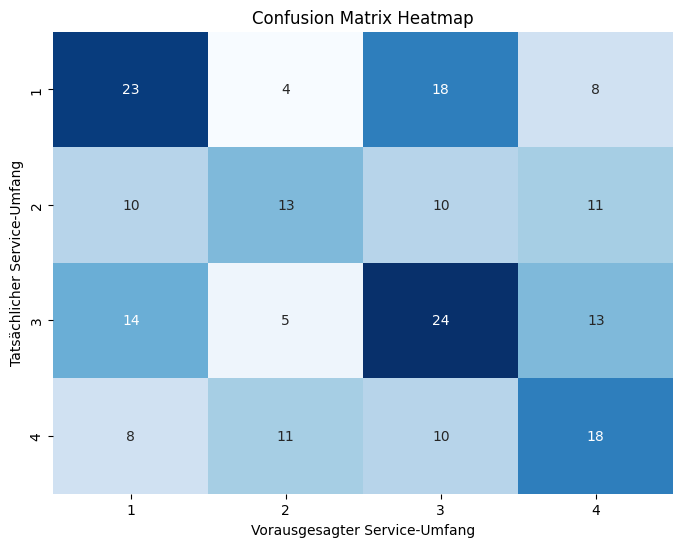

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion-Matrix berechnen
matrix = confusion_matrix(y_test, y_pred_best)
labels = sorted(y.unique())


# Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(matrix, annot=True, fmt='g', cmap='Blues', cbar=False,
            xticklabels=labels,  yticklabels=labels)

plt.title('Confusion Matrix Heatmap')
plt.xlabel('Vorausgesagter Service-Umfang')
plt.ylabel('Tatsächlicher Service-Umfang')
plt.show()

<Axes: >

Text(0.5, 1.0, 'Feature Importance im Random Forest')

Text(0.5, 0, 'Wichtigkeit')

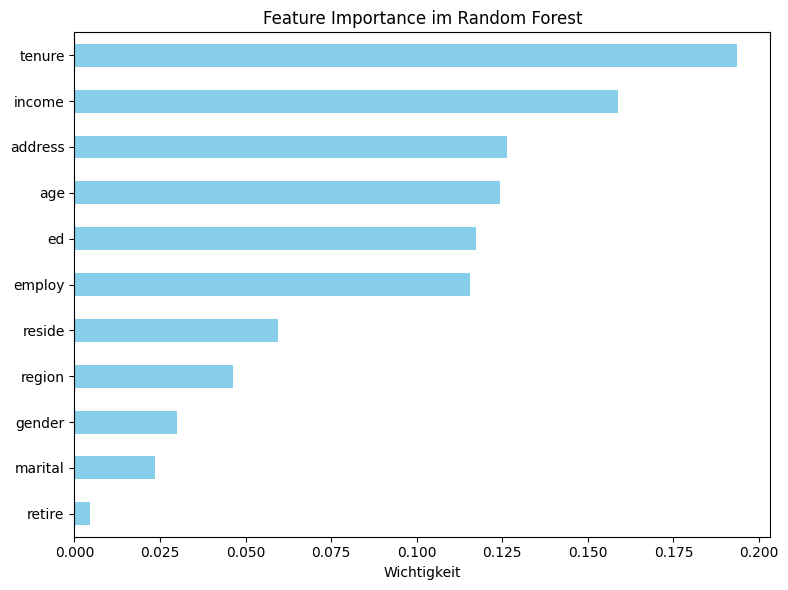

In [ ]:
# Wichtigkeit der Variablen
feature_importance = pd.Series(best_forest.feature_importances_, index=X.columns)

# Balkendiagramm
feature_importance.sort_values().plot(kind='barh', figsize=(8, 6), color='skyblue')
plt.title("Feature Importance im Random Forest")
plt.xlabel("Wichtigkeit")
plt.tight_layout()
plt.show()

<Figure size 800x600 with 0 Axes>

<BarContainer object of 4 artists>

Text(0.5, 0, 'Klasse')

Text(0, 0.5, 'F1-Score')

Text(0.5, 1.0, 'F1-Score pro Klasse')

(0.0, 1.0)

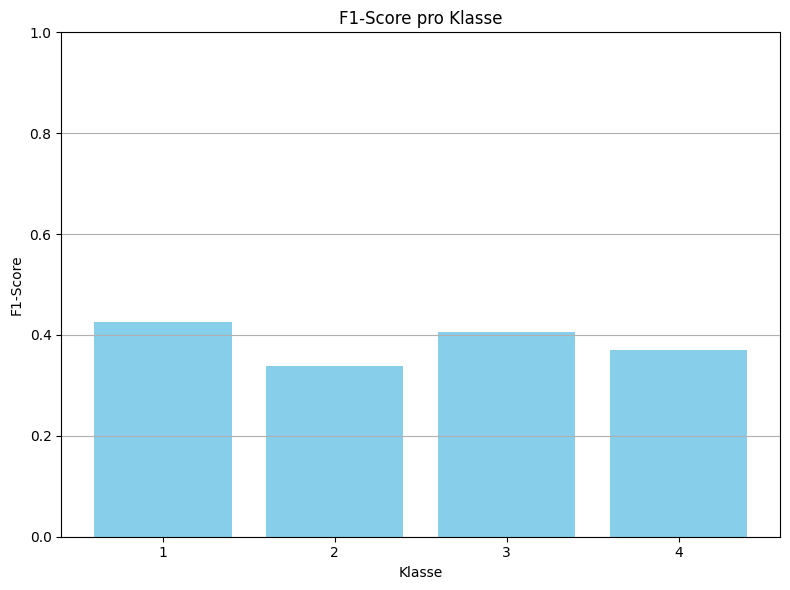

In [ ]:
# Klassifikationsbericht als Dictionary
report = classification_report(y_test, y_pred_best, output_dict=True)

# F1-Score pro Klasse extrahieren
f1_per_class = {label: metrics['f1-score'] for label, metrics in report.items() if label.isdigit()}

# Balkendiagramm
plt.figure(figsize=(8,6))
plt.bar(f1_per_class.keys(), f1_per_class.values(), color='skyblue')
plt.xlabel('Klasse')
plt.ylabel('F1-Score')
plt.title('F1-Score pro Klasse')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

<Figure size 800x600 with 0 Axes>

Text(0.41818181818181815, 0.4339622641509434, 'Klasse 1')

Text(0.3939393939393939, 0.29545454545454547, 'Klasse 2')

Text(0.3870967741935484, 0.42857142857142855, 'Klasse 3')

Text(0.36, 0.3829787234042553, 'Klasse 4')

Text(0.5, 0, 'Precision')

Text(0, 0.5, 'Recall')

Text(0.5, 1.0, 'Precision vs. Recall pro Klasse')

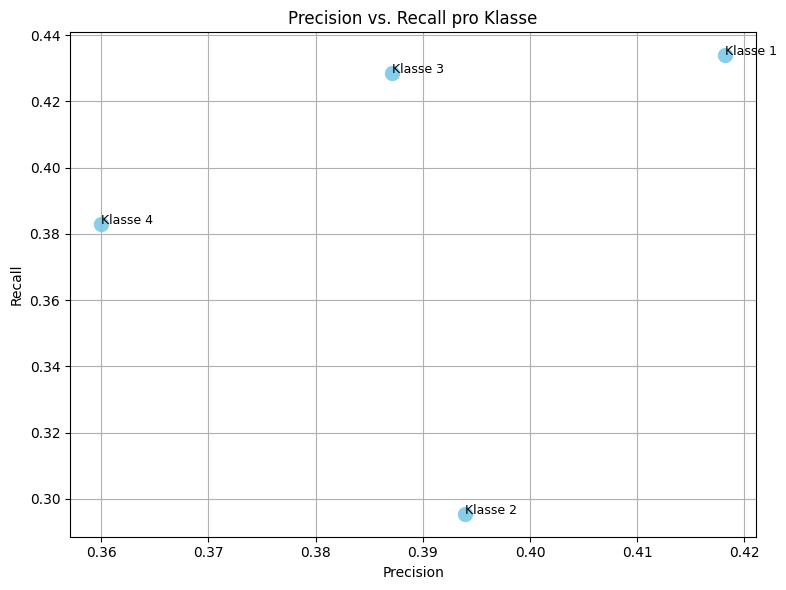

In [ ]:
# Precision und Recall pro Klasse extrahieren
precision_per_class = {label: metrics['precision'] for label, metrics in report.items() if label.isdigit()}
recall_per_class = {label: metrics['recall'] for label, metrics in report.items() if label.isdigit()}

# Plot erstellen
plt.figure(figsize=(8,6))
plt.scatter(precision_per_class.values(), recall_per_class.values(), s=100, c='skyblue')

# Klassenlabels anzeigen
for label in precision_per_class:
    plt.text(precision_per_class[label], recall_per_class[label], f'Klasse {label}', fontsize=9)

plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision vs. Recall pro Klasse')
plt.grid(True)
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'F1-Score, Precision & Recall pro Klasse')

Text(0.5, 36.72222222222221, 'Metrik')

Text(95.72222222222221, 0.5, 'Klasse')

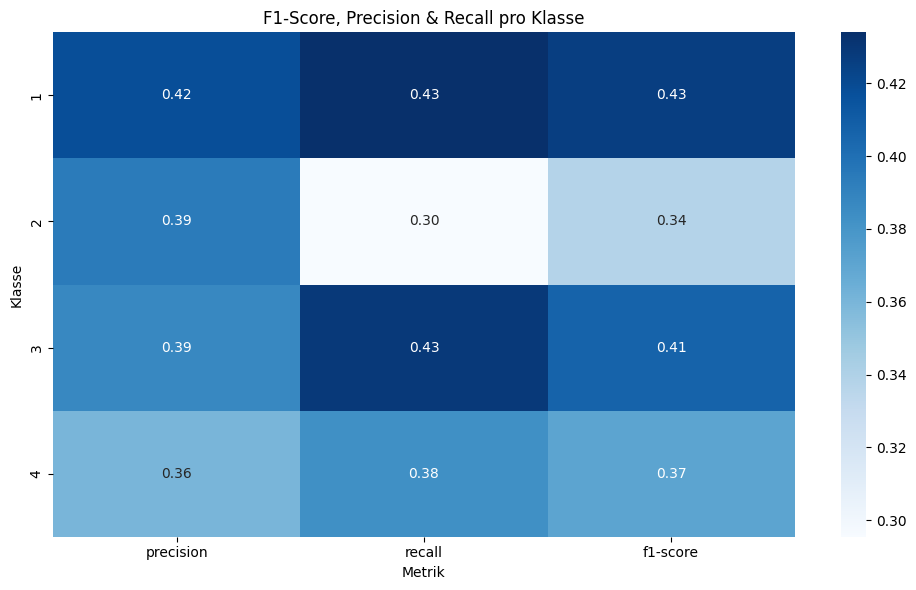

In [ ]:
# Nur numerische Klassen extrahieren
metrics_df = pd.DataFrame({label: metrics for label, metrics in report.items() if label.isdigit()}).T

# Nur relevante Spalten behalten
metrics_df = metrics_df[['precision', 'recall', 'f1-score', 'support']]

# Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(metrics_df.iloc[:, :3], annot=True, cmap='Blues', fmt=".2f")
plt.title("F1-Score, Precision & Recall pro Klasse")
plt.xlabel("Metrik")
plt.ylabel("Klasse")
plt.tight_layout()
plt.show()

# Beste Features

In [ ]:
# Auswahl beste Variablen
top_features = ['tenure', 'income', 'address', 'age', 'ed', 'employ']
X_top = telefonkunden[top_features]

# Train-Test-Split
from sklearn.model_selection import train_test_split
X_train_top, X_test_top, y_train_top, y_test_top = train_test_split(
    X_top, y, test_size=0.2, random_state=42, stratify=y)

# Modelltraining
from sklearn.ensemble import RandomForestClassifier

model_top = grid_search.best_estimator_
model_top.fit(X_train_top, y_train)

y_pred_top = model_top.predict(X_test_top)
accuracy_top = accuracy_score(y_test, y_pred_top)
print(f"Genauigkeit mit Top-Features: {accuracy_top:.4f}")

# Trainingsgenauigkeit
y_train_pred_top = model_top.predict(X_train_top)
accuracy_train_top = accuracy_score(y_train_top, y_train_pred_top)
print(f"Trainingsgenauigkeit mit Top-Features: {accuracy_train_top:.4f}")

# Cross-Validation
from sklearn.model_selection import cross_val_score

cv_scores_top = cross_val_score(model_top, X_top, y, cv=5)
print(f"Cross-Validation Accuracy mit Top-Features: {cv_scores_top.mean():.4f}")

RandomForestClassifier(max_depth=12, min_samples_leaf=3, min_samples_split=4,
                       n_estimators=125, random_state=1)

Genauigkeit mit Top-Features: 0.3950
Trainingsgenauigkeit mit Top-Features: 0.9113
Cross-Validation Accuracy mit Top-Features: 0.3880
